In [9]:
import sys
#Change to own path
sys.path.insert(0, "/home/npatzlaff/Documents/rewiring-effects/")
from funcs.base import *

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
i_e, t_e, i_i, t_i = simulator(N=500, ee_mi=1, ei_mi=1, ie_mi=19.5, ii_mi=19.5, E_H=30*mV, I_H=30*mV)
ex_fr, in_fr, _ = rewiring_dynamics(N=500, ee_mi=1, ei_mi=1, ie_mi=19.5, ii_mi=19.5, E_H=30*mV, I_H=30*mV)

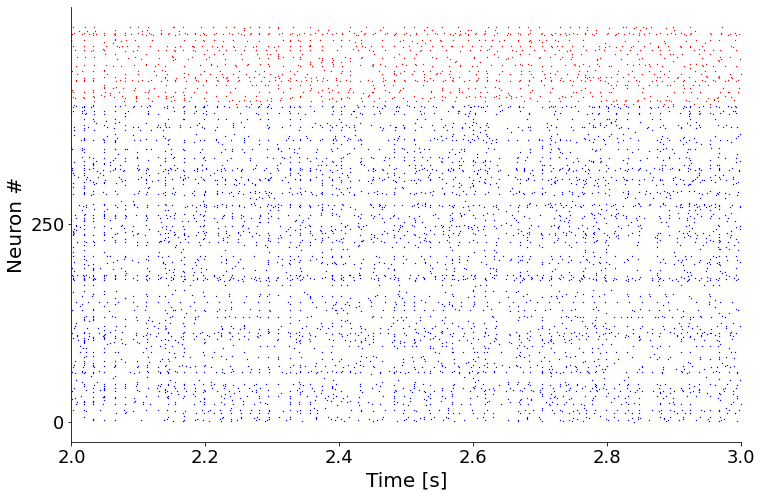

In [12]:
fig, raster_plot = plt.subplots(1,1,figsize=(12,8))

raster_plot.plot(t_e/1000, i_e, "b*", ms=0.8)
raster_plot.plot(t_i/1000, i_i+400, "r*", ms=0.8)
raster_plot.set_xlim([2,3])
raster_plot.set_xlabel("Time [s]", fontsize=20)
raster_plot.set_ylabel("Neuron #", fontsize=20)
raster_plot.set_yticks(np.arange(0,500,250))
#raster_plot.set_xticks(np.arange(2,2.6,0.25))
for tick in raster_plot.xaxis.get_major_ticks():
        tick.label.set_fontsize(18)
for tick in raster_plot.yaxis.get_major_ticks():
        tick.label.set_fontsize(18)

sns.despine()

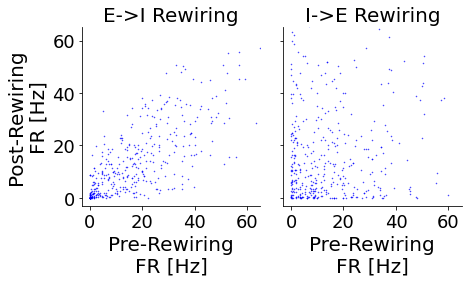

In [28]:
fig, sc_axes = plt.subplots(1,2, figsize=(6, 5), sharey=True)
plt.tight_layout( w_pad=0.7, h_pad=7)
plt.rcParams['axes.labelsize'] = 20

sc_axes[0].plot(ex_fr[1], ex_fr[2], ".b", ms=1, alpha=0.8)
#sc_axes[0].plot(b_in_frs[0][1], b_in_frs[0][2], ".r", ms=0.8)
sc_axes[0].set_aspect(1)
sc_axes[0].set_xlim([-3,65])
sc_axes[0].set_ylim([-3,65])
sc_axes[0].set_yticks(np.arange(0,70,20))

for tick in sc_axes[0].xaxis.get_major_ticks():
        tick.label.set_fontsize(18)
for tick in sc_axes[0].yaxis.get_major_ticks():
        tick.label.set_fontsize(18)

sc_axes[0].set_xlabel("Pre-Rewiring\nFR [Hz]", fontsize=20)
sc_axes[0].set_ylabel("Post-Rewiring\nFR [Hz]", fontsize=20)
sc_axes[0].set_title("E->I Rewiring", fontsize=20)


#sc_ax = fig.add_subplot(2,5,9)
sc_axes[1].plot(ex_fr[2], ex_fr[3], ".b", ms=1, alpha=0.8)
#sc_axes[1].plot(b_in_frs[0][2], b_in_frs[0][3], ".r", ms=0.8)
sc_axes[1].set_aspect(1)
sc_axes[1].set_xlim([-3,65])
sc_axes[1].set_ylim([-3,65])
sc_axes[1].set_yticks(np.arange(0,70,20))

for tick in sc_axes[1].xaxis.get_major_ticks():
        tick.label.set_fontsize(18)
for tick in sc_axes[1].yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
        
sc_axes[1].set_xlabel("Pre-Rewiring\nFR [Hz]")
#sc_axes[1].set_ylabel("Post-Rewiring\nFR [Hz]")
sc_axes[1].set_title("I->E Rewiring", fontsize=20)

sns.despine()
#plt.savefig("figures/1Fig_scatters02.pdf")

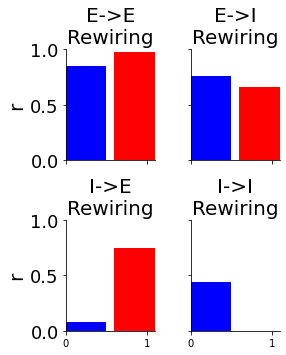

In [30]:
fig, cor_plots = plt.subplots(2,2, figsize=(3.7, 4.5), sharex = True, sharey=True)

plt.tight_layout( w_pad=2, h_pad=5)
plt.rcParams['axes.labelsize'] = 20

ex_cor = np.corrcoef(ex_fr)
in_cor = np.corrcoef(in_fr)


#cor_plots params
positions = [0, 0.6]
width = [0.5, 0.5]
error_kw = {"lw":2}
capsize=3
align="edge"
xlim=[0,1.1]
yticks = np.arange(0,1.1, 0.5)
fc = (0,0,0,0)
ec = "k"
ls="dotted"
lw=2.5

cor_plots[0,0].bar(positions,[ex_cor[0][1], in_cor[0][1]], 
              width  = width, color = ['b', 'r'], align = align)
cor_plots[0,0].set_ylim([0,1])
cor_plots[0,0].set_xlim(xlim)
cor_plots[0,0].set_yticks(yticks)
cor_plots[0,0].set_title("E->E\nRewiring", fontsize=20)

cor_plots[0,1].bar(positions,[ex_cor[1][2], in_cor[1][2]], 
              width  = width, color = ['b', 'r'], align = align)
cor_plots[0,1].set_ylim([0,1])
cor_plots[0,1].set_xlim(xlim)
cor_plots[0,1].set_title("E->I\nRewiring", fontsize=20)

cor_plots[1,0].bar(positions,[ex_cor[2][3], in_cor[2][3]], 
              width  = width, color = ['b', 'r'], align = align)
cor_plots[1,0].set_ylim([0,1])
cor_plots[1,0].set_xlim(xlim)
cor_plots[1,0].set_title("I->E\nRewiring", fontsize=20)

cor_plots[1,1].bar(positions,[ex_cor[3][4], in_cor[3][4]], 
              width  = width, color = ['b', 'r'], align = align)
cor_plots[1,1].set_ylim([0,1])
cor_plots[1,1].set_xlim(xlim)
cor_plots[1,1].set_title("I->I\nRewiring", fontsize=20)

for tick in cor_plots[0,0].yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
for tick in cor_plots[1,0].yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
cor_plots[0,0].set_ylabel("r", fontsize=20)
cor_plots[1,0].set_ylabel("r", fontsize=20)

sns.despine()